<a href="https://colab.research.google.com/github/chw8207/image_python/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%26%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%ED%8A%9C%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### GPU 설정

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0' :
    raise SystemError('GPU device not found')
print(f'Found GPU at: {device_name}')

Found GPU at: /device:GPU:0


In [4]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7881343922499961897
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5266211633297791209
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### 신경망의 구성, 학습, 평가 실습

In [5]:
# 데이터셋 생성하기
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [6]:
y

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,

In [7]:
# 레이블에 원-핫 인코딩 적용
y = to_categorical(y)

In [8]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
# 데이터셋 분류
n_train = 800
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


In [10]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
hist = model.fit(train_X, train_y, validation_data = (test_X, test_y), epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 2s 13ms/step - loss: 0.9251 - accuracy: 0.4663 - val_loss: 0.8094 - val_accuracy: 0.5250
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8202 - accuracy: 0.5462 - val_loss: 0.7254 - val_accuracy: 0.6250
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.7542 - accuracy: 0.6050 - val_loss: 0.6704 - val_accuracy: 0.7000
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7127 - accuracy: 0.6513 - val_loss: 0.6367 - val_accuracy: 0.7350
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.6662 - val_loss: 0.6116 - val_accuracy: 0.7500
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.6800 - val_loss: 0.5899 - val_accuracy: 0.7500
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.6938 - val_loss: 0.5744 - val_accuracy: 0.7650
Epoch

In [12]:
# 모델의 성능 평가하기
_, train_acc = model.evaluate(train_X, train_y)
_, test_acc = model.evaluate(test_X, test_y)
print('Train: %.3f, Test: %.3f' %(train_acc, test_acc))

7/7 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8350
Train: 0.835, Test: 0.835


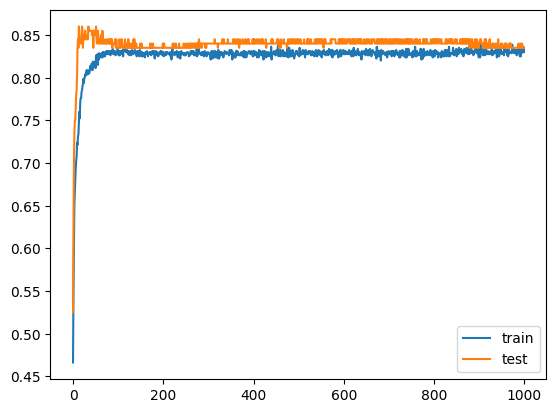

In [13]:
# 정확도를 기준으로 모델의 학습 곡선 그리기
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()



```python
# L2규제화
model.add(Dense(units=16, kernel_regularizer=regularizers.l2(lambda), acitivation='relu')
```





```python
# 이미지 강화
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(training_set)
```



- 신경망에 배치 정규화층 추가하기



```python
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Dense(hidden_units, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(units, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))
```



### 이미지 분류 정확도 개선하기

2. 데이터 준비

In [20]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

170498071/170498071 [==============================] - 6s 0us/step


In [21]:
# 모양 확인하기
print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('X_test = ', X_test.shape)

X_train =  (45000, 32, 32, 3)
X_valid =  (5000, 32, 32, 3)
X_test =  (10000, 32, 32, 3)


In [23]:
# 데이터 정규화
mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis=(0,1,2,3))
X_train = (X_train - mean) / (std + 1e-7)
X_valid = (X_valid - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)

In [25]:
# 원-핫 인코딩 적용하기
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [26]:
# 데이터 강화하기

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)